In [1]:
import torch
import numpy as np
from torchvision import datasets, transforms
import torch.nn.functional as F

In [50]:
batch_size = 64
num_workers= 0

In [51]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize([0.5], [0.5])])                             

In [52]:
train_data= datasets.FashionMNIST(root='data', train=True, download=True, transform= transform)
test_data = datasets.FashionMNIST(root='data', train=False, download=True, transform=transform)

In [53]:
train_loader= torch.utils.data.DataLoader(train_data,batch_size=batch_size,num_workers=num_workers)
test_loader= torch.utils.data.DataLoader(test_data,batch_size=batch_size,num_workers=num_workers)

(64, 1, 28, 28)


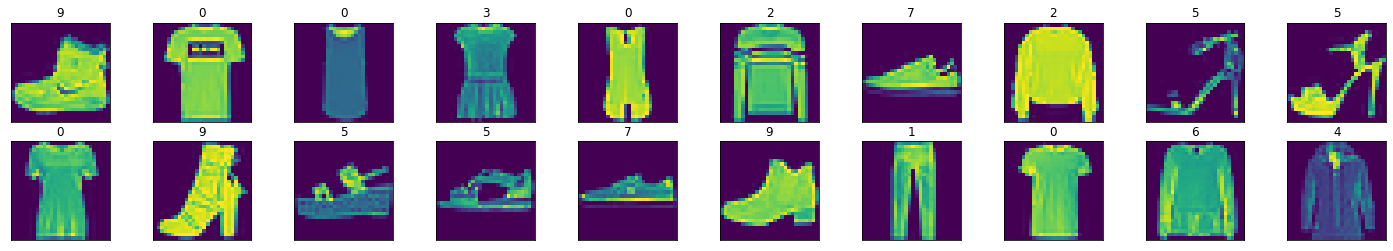

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()
print(images.shape)

fig= plt.figure(figsize=(25,4))


for idx in np.arange(20):
    ax=fig.add_subplot(2,20/2,idx+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(images[idx]))
    ax.set_title(str(labels[idx].item()))


In [47]:
from torch import nn


class Classifier(nn.Module):
    def __init__(self):
        super(Classifier,self).__init__()
        
        
        self.fc1 = nn.Linear(784,256)
        self.fc2 = nn.Linear(256,128)
        self.fc3 = nn.Linear(128,64)
        self.fc4 = nn.Linear(64,10)
        
        
        self.dropout= nn.Dropout(0.2)

        
    def forward(self,x):
        x = x.view(-1,784)
    
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
    
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
    
        x = F.relu(self.fc3(x))
        x = self.dropout(x)
    
        x = F.log_softmax(self.fc4(x),dim = 1 )
        return x



model= Classifier()
print(model)

Classifier(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


In [57]:
from torch import optim 


criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.002)


In [71]:
epochs = 20

train_losses=[]
test_losses =[]

for e in range(epochs):
    running_loss=0.0
    
    
    for images, labels in train_loader:
        optimizer.zero_grad()
        
        
        output=model(images)
        loss=criterion(output,labels)
        loss.backward()
        optimizer.step()
        
        running_loss+=loss.item()
    else:
        test_loss=0
        accuracy=0
        
        
        with torch.no_grad():
        
            model.eval()
        
        
            for images, labels in test_loader:
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)
        
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim = 1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
    
        model.train()
        train_losses.append(running_loss/len(train_loader))
        test_losses.append(test_loss/len(test_loader))
    
        print("Epoch: {}/{}..".format(e+1, epochs),
              "Training loss: {:.3f}..".format(running_loss/len(train_loader)),
              "Test loss: {:.3f}..".format(test_loss/len(test_loader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(test_loader)))
        

Epoch: 1/20.. Training loss: 0.288.. Test loss: 0.369.. Test Accuracy: 0.877
Epoch: 2/20.. Training loss: 0.284.. Test loss: 0.372.. Test Accuracy: 0.880
Epoch: 3/20.. Training loss: 0.285.. Test loss: 0.364.. Test Accuracy: 0.879
Epoch: 4/20.. Training loss: 0.287.. Test loss: 0.345.. Test Accuracy: 0.882
Epoch: 5/20.. Training loss: 0.278.. Test loss: 0.369.. Test Accuracy: 0.878
Epoch: 6/20.. Training loss: 0.278.. Test loss: 0.369.. Test Accuracy: 0.876
Epoch: 7/20.. Training loss: 0.278.. Test loss: 0.380.. Test Accuracy: 0.872
Epoch: 8/20.. Training loss: 0.278.. Test loss: 0.360.. Test Accuracy: 0.880
Epoch: 9/20.. Training loss: 0.274.. Test loss: 0.376.. Test Accuracy: 0.869
Epoch: 10/20.. Training loss: 0.275.. Test loss: 0.370.. Test Accuracy: 0.879
Epoch: 11/20.. Training loss: 0.270.. Test loss: 0.382.. Test Accuracy: 0.874
Epoch: 12/20.. Training loss: 0.269.. Test loss: 0.376.. Test Accuracy: 0.878
Epoch: 13/20.. Training loss: 0.271.. Test loss: 0.376.. Test Accuracy: 0

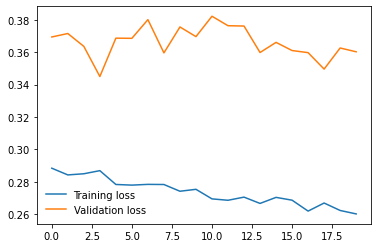

In [72]:
plt.plot(train_losses, label = "Training loss")
plt.plot(test_losses, label = "Validation loss")
plt.legend(frameon = False)

In [73]:
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()
    
    
    

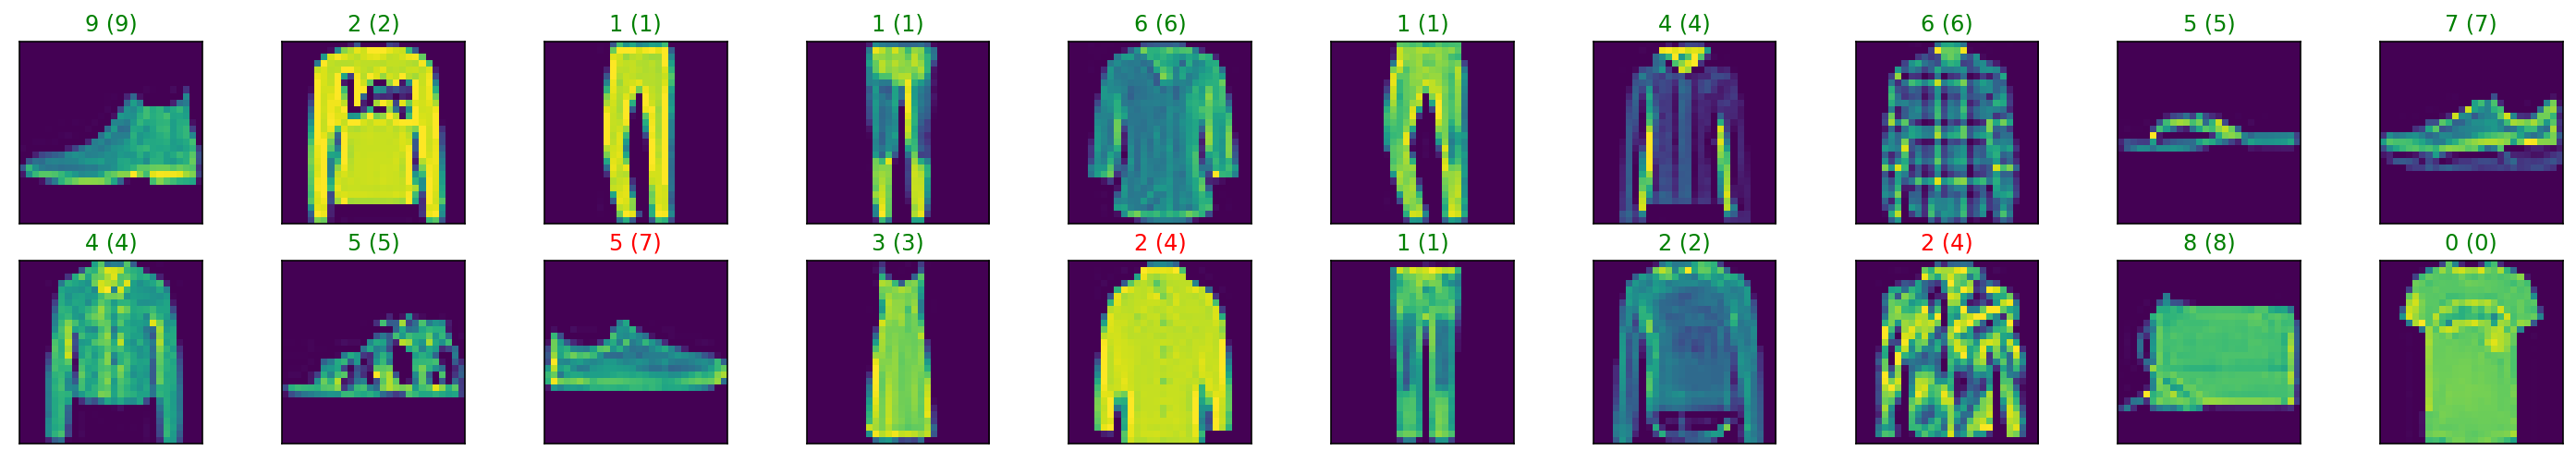

In [81]:
images,labels= next(iter(test_loader))
output=model(images)
_,preds=torch.max(output,1)
images= images.numpy()


fig=plt.figure(figsize=[25,4])
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]))
    ax.set_title("{} ({})".format(str(preds[idx].item()),str(labels[idx].item())),
                color=("green" if preds[idx]==labels[idx] else "red"))